# Ashare ( 开源 极简 A股实时行情数据API)

中国股市A股股票行情实时数据最简封装API接口,包含日线,分时分钟线,全部格式成DataFrame格式数据,可用来研究，量化分析，证券股票程序化自动

化交易系统 行情系统包括新浪腾讯双数据核心，自动故障切换，为量化研究者在数据获取方面极大地减轻工作量，更加专注于策略和模型的研究与实

现。

## 功能特点

- 核心库轻量化:项目库就一个文件Ashare.py,不用安装设置，可自由裁剪，随用随走 from Ashare import * 即可

- 双内核封装，新浪财经，腾讯股票的实时行情数据，包括任意历史日线，周线，月线，分钟线，小时线等，已经稳定运行数年

- 双内核一主一备，自动热备，自动切换，Ashare即使用来做量化实盘行情源也可以满足。

- 全部数据格式清理成DataFrame格式数据，让您非常方便的使用pandas来分析和处理

- 和其他行情库（tushare等）比的优点是什么？ -- 简单 轻量 便携 开源

- Ashare把复杂的数据获取，拆分，整合逻辑全部封装成一个函数 get_price() 看完下面例子就会了

- Ashare可以用在任何需要量化研究，量化分析的场合


## 先看一个最简单的例子 Demo1.py

In [ ]:
from Ashare.Ashare import *

df = get_price('sh000001',frequency='1d',count=5)      #默认获取今天往前5天的日线实时行情
print('上证指数日线行情\n',df)

df=get_price('000001.XSHG',frequency='1d',count=5,end_date='2021-04-30')  #可以指定结束日期，获取历史行情
print('上证指数历史行情\n',df)                        

df=get_price('000001.XSHG',frequency='1w',count=5,end_date='2018-06-15')  #支持'1d'日, '1w'周,  '1M'月  
print('上证指数历史周线\n',df) 

df=get_price('sh600519',frequency='15m',count=5)     #分钟线实时行情，可用'1m','5m','15m','30m','60m'
print('贵州茅台15分钟线\n',df)

df=get_price('600519.XSHG',frequency='60m',count=6)  #分钟线实时行情，可用'1m','5m','15m','30m','60m'
print('贵州茅台60分钟线\n',df)


## 再看一个配合MyTT的例子 Demo2.py


上证指数日线行情
                 open      high       low     close        volume
                                                                
2022-01-11  3589.904  3602.145  3562.754  3567.441  3.597619e+10
2022-01-12  3578.163  3599.499  3572.097  3597.432  3.431330e+10
2022-01-13  3601.027  3601.073  3555.158  3555.259  3.693684e+10
2022-01-14  3544.065  3548.420  3519.322  3521.256  3.769370e+10
2022-01-17  3522.085  3546.085  3519.426  3541.666  3.128867e+10


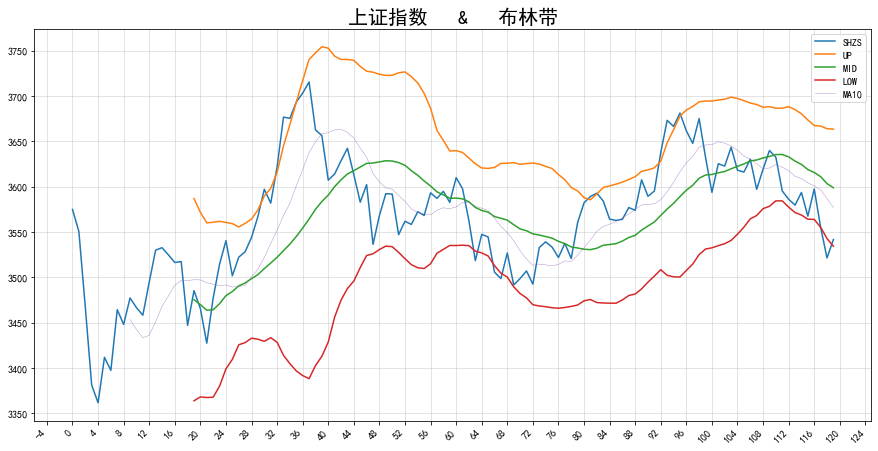

In [1]:
#股市行情数据获取和作图 -2
from Ashare.Ashare import *          #股票数据库    https://github.com/mpquant/Ashare
from Ashare.MyTT import *            #myTT麦语言工具函数指标库  https://github.com/mpquant/MyTT
    
# 证券代码兼容多种格式 通达信，同花顺，聚宽
# sh000001 (000001.XSHG)    sz399006 (399006.XSHE)   sh600519 ( 600519.XSHG ) 

df=get_price('000001.XSHG',frequency='1d',count=120)      #默认获取今天往前120天的日线行情
print('上证指数日线行情\n',df.tail(5))

#-------有数据了，下面开始正题 -------------
CLOSE=df.close.values;         OPEN=df.open.values           #基础数据定义，只要传入的是序列都可以  Close=df.close.values 
HIGH=df.high.values;           LOW=df.low.values             #例如  CLOSE=list(df.close) 都是一样

MA5=MA(CLOSE,5)                                #获取5日均线序列
MA10=MA(CLOSE,10)                              #获取10日均线序列
up,mid,lower=BOLL(CLOSE)                       #获取布林带指标数据

#-------------------------作图显示-----------------------------------------------------------------
import matplotlib.pyplot as plt ;  from matplotlib.ticker import MultipleLocator
plt.figure(figsize=(15,8))  
plt.plot(CLOSE,label='SHZS');    plt.plot(up,label='UP');           #画图显示 
plt.plot(mid,label='MID');       plt.plot(lower,label='LOW');
plt.plot(MA10,label='MA10',linewidth=0.5,alpha=0.7);
plt.legend();         plt.grid(linewidth=0.5,alpha=0.7);    plt.gcf().autofmt_xdate(rotation=45);
plt.gca().xaxis.set_major_locator(MultipleLocator(len(CLOSE)/30))    #日期最多显示30个
plt.title('上证指数   &   布林带',fontsize=20);   plt.show()


![avatar][base64str]

### 股市程序化交易大群, 圈内大咖量化策略分享

### 全是干货，无闲聊 ，物以类聚,人以群分，一起感受思维碰撞的力量!


[base64str]: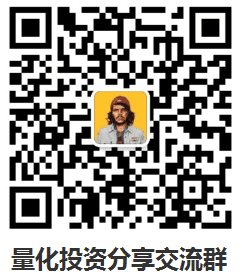